In [15]:
# Packages
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras import datasets, utils

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle


In [17]:
# Data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)


In [25]:
# Network 1: Train

# Model definition
filters = 20
kernel_size = (5, 5)
input_shape = (28, 28, 1)
mean = 0
stddev = 0.01
weight_decay = 1e-4

narrow_normal = initializers.RandomNormal(mean=mean, stddev=stddev)
kernel_regularizer = regularizers.l2(weight_decay)

model = models.Sequential([
    layers.Reshape(input_shape),
    layers.ZeroPadding2D(padding=1),
    layers.Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', kernel_initializer=narrow_normal, kernel_regularizer=kernel_regularizer),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(100, activation='relu', kernel_initializer=narrow_normal, kernel_regularizer=kernel_regularizer),
    layers.Dense(10, activation='softmax', kernel_initializer=narrow_normal, kernel_regularizer=kernel_regularizer)
])

# Model compilation
momentum = 0.9
learning_rate = 0.01 # 0.001

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
    metrics=['accuracy'],
)

# Model fit
epochs = 60
batch_size = 128 #8192
validation_split = 1 / 6
validation_freq = 1 #5
patience = 5

early_stopping = callbacks.EarlyStopping(patience=patience)

history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    validation_freq=validation_freq,
    callbacks=[early_stopping]
)

model.save("network1")

with open('network1/assets/history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


Epoch 1/60
391/391 [==============================] - 9s 24ms/step - loss: 1.3107 - accuracy: 0.5506 - val_loss: 0.3373 - val_accuracy: 0.8997
Epoch 2/60
391/391 [==============================] - 9s 24ms/step - loss: 0.2604 - accuracy: 0.9228 - val_loss: 0.2069 - val_accuracy: 0.9411
Epoch 3/60
391/391 [==============================] - 9s 24ms/step - loss: 0.1780 - accuracy: 0.9477 - val_loss: 0.1383 - val_accuracy: 0.9629
Epoch 4/60
391/391 [==============================] - 9s 23ms/step - loss: 0.1404 - accuracy: 0.9594 - val_loss: 0.1298 - val_accuracy: 0.9638
Epoch 5/60
391/391 [==============================] - 9s 23ms/step - loss: 0.1185 - accuracy: 0.9664 - val_loss: 0.1132 - val_accuracy: 0.9684
Epoch 6/60
391/391 [==============================] - 10s 25ms/step - loss: 0.1038 - accuracy: 0.9708 - val_loss: 0.1144 - val_accuracy: 0.9702
Epoch 7/60
391/391 [==============================] - 9s 24ms/step - loss: 0.0906 - accuracy: 0.9755 - val_loss: 0.1065 - val_accuracy: 0.970

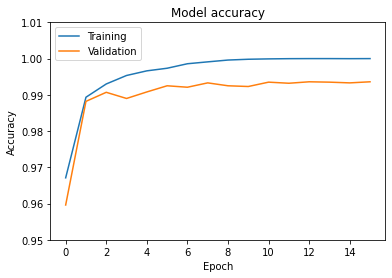

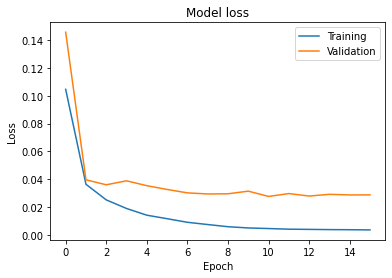

In [47]:
# Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.95, 1.01)
plt.legend(['Training', 'Validation'])
#plt.savefig('net1accuracy.png', bbox_inches='tight')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
#plt.savefig('net1loss.png', bbox_inches='tight')
plt.show()

In [29]:

print("Evaluate on test data")
score = model.evaluate(x_test, y_test, batch_size=128)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Evaluate on test data
79/79 [==============================] - 1s 7ms/step - loss: 0.0632 - accuracy: 0.9840
Test loss: 0.06324350833892822
Test accuracy: 0.984000027179718


In [33]:
# Network 2: Train 
 
# Model definition
filters_1 = 20
filters_2 = 30
filters_3 = 50
kernel_size = (3, 3)
input_shape = (28, 28, 1)
mean = 0
stddev = 0.01
weight_decay = 1e-4

narrow_normal = initializers.RandomNormal(mean=mean, stddev=stddev)
kernel_regularizer = regularizers.l2(weight_decay)

model = models.Sequential([
    layers.Reshape(input_shape),
    layers.ZeroPadding2D(padding=1),
    layers.Conv2D(filters=filters_1, kernel_size=kernel_size, activation='relu', kernel_initializer=narrow_normal, kernel_regularizer=kernel_regularizer),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.ZeroPadding2D(padding=1),
    layers.Conv2D(filters=filters_2, kernel_size=kernel_size, activation='relu', kernel_initializer=narrow_normal, kernel_regularizer=kernel_regularizer),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.ZeroPadding2D(padding=1),
    layers.Conv2D(filters=filters_3, kernel_size=kernel_size, activation='relu', kernel_initializer=narrow_normal, kernel_regularizer=kernel_regularizer),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax', kernel_initializer=narrow_normal, kernel_regularizer=kernel_regularizer)
])

# Model compilation
momentum = 0.9
learning_rate = 0.01

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
    metrics=['accuracy'],
)

# Model fit
epochs = 30
batch_size = 128 #8192
validation_split = 1 / 6
validation_freq = 1 #5
patience = 5

early_stopping = callbacks.EarlyStopping(patience=patience)

history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    validation_freq=validation_freq,
    callbacks=[early_stopping]
)

model.save("network2")

with open('network2/assets/history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/30
391/391 [==============================] - 30s 76ms/step - loss: 0.1046 - accuracy: 0.9671 - val_loss: 0.1455 - val_accuracy: 0.9596
Epoch 2/30
391/391 [==============================] - 32s 82ms/step - loss: 0.0365 - accuracy: 0.9893 - val_loss: 0.0397 - val_accuracy: 0.9882
Epoch 3/30
391/391 [==============================] - 30s 77ms/step - loss: 0.0253 - accuracy: 0.9930 - val_loss: 0.0361 - val_accuracy: 0.9907
Epoch 4/30
391/391 [==============================] - 29s 74ms/step - loss: 0.0191 - accuracy: 0.9953 - val_loss: 0.0390 - val_accuracy: 0.9890
Epoch 5/30
391/391 [==============================] - 29s 75ms/step - loss: 0.0143 - accuracy: 0.9966 - val_loss: 0.0355 - val_accuracy: 0.9908
Epoch 6/30
391/391 [==============================] - 29s 74ms/step - loss: 0.0118 - accuracy: 0.9973 - val_loss: 0.0328 - val_accuracy: 0.9925
Epoch 7/30
391/391 [==============================] - 30s 77ms/step - loss: 0.0092 - accuracy: 0.9986 - val_loss: 0.0303 - val_accuracy:

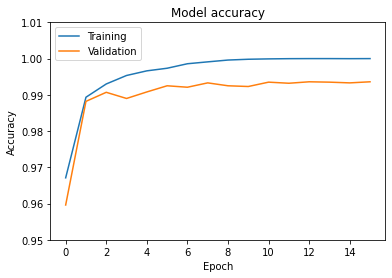

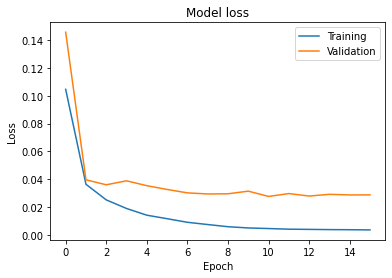

In [49]:
# Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.95, 1.01)
plt.legend(['Training', 'Validation'])
# plt.savefig('net2accuracy.png', bbox_inches='tight')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
# plt.savefig('net2loss.png', bbox_inches='tight')
plt.show()

In [41]:

print("Evaluate on test data")
score = model.evaluate(x_test, y_test, batch_size=128)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Evaluate on test data
79/79 [==============================] - 1s 15ms/step - loss: 0.0209 - accuracy: 0.9942
Test loss: 0.02088683471083641
Test accuracy: 0.9941999912261963
